# Worksheet 3 solution
In this sheet we will work on latent variable methods for density estimation and dimensionality reduction.

If you have been finding the datasets in the labs or the group project a bit of a challenge, then this picture may look familiar.

![Figure: worksheet datasets versus datasets in the wild](./datasetsWild.jpg)


## Singular values (level 2 only)
We first test out our understanding of singular values and condition numbers of matrices. Read the following segment of code.

In [22]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline


E =np.array( [[0.0315,   0.0188,   0.0117,  -0.0919], \
   [-0.0166,   -0.0211,  -0.0106,   0.0550], \
   [-0.2431,   -0.0874,   -0.0666,    0.6705], \
   [-0.2346,   -0.0680,   -0.0574,    0.6348]])

Complete the next block so as to compute the singular values of the matrix $E$ and write down the condition number of the matrix. Then add $10^{-4}$ to the diagonal elements of $E$. Write down the new condition number.

In [23]:
#TODO block 1
svd_E=np.linalg.svd(E)
conditional_number=np.linalg.cond(E)
print(conditional_number)
v=10**(-4)*np.eye(4,4)
a=np.diag(v)
E_con=E+a
con_num_diag=np.linalg.cond(E_con)
print(con_num_diag)

94064.30707150648
6549.59626949236


## Mixture models: 1d example. (For all)
In this section we will look at the basics of fitting a Gaussian mixture model to some one-dimensional data. In the first block of code we create a one-dimensional data of length 10 as a column vector. Read the code carefully so that you understand how the data was created.

In [56]:
from sklearn import mixture
from numpy.random import Generator, PCG64
mean = 2
sigma = np.sqrt(5)
rng = Generator(PCG64(12345))
vals = mean + sigma*rng.standard_normal(10)
vals[9] = 10

vals[:, np.newaxis]
vals = vals.reshape(-1, 1)
vals

array([[-1.18376957],
       [ 4.82578274],
       [ 0.05314117],
       [ 1.42047103],
       [ 1.83152724],
       [ 0.34333155],
       [-1.05847746],
       [ 3.45096842],
       [ 2.80735048],
       [10.        ]])

In the following block of code we fit a GMM with 5 components and default parameters (setting the initial random state to ensure that the code is reproducible). The function `score_samples` computes a vector containing the log likelihood of every point in `Z`. More detail can be found in the __[API](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__

In [68]:
clf = mixture.GaussianMixture(n_components=5, covariance_type='spherical', random_state =1729)
clf.fit(vals)

Z = clf.score_samples(vals)
print('Log likelihood=' + str(Z))

Log likelihood=[-0.25812186 -2.8669242  -1.09798939 -1.44433765 -1.44217811 -1.09794687
 -0.25812184 -2.0049397  -2.39991244  3.68623152]


In the next block of code, create and fit a GMM with parameters as above but also set the maximum number of iterations to 1000
(to ensure that the EM algorithm runs for a long time), the initial centres to [[0], [0.01], [-0.01], [0.0001], [8]], `reg_covar` 
to 0, and `tol` to `1e-30`. Run the code and write down what happens. Try to explain it. 

You may find it helpful to consult the __[API for the GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture)__

In [70]:
#TODO block 2
vals2=[[0], [0.01], [-0.01], [0.0001], [8]]
clf2=mixture.GaussianMixture(n_components=5, covariance_type='spherical',means_init=vals2, random_state =1729,max_iter=1000,reg_covar=0)
clf2.fit(vals)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

## Mixture models: experiments with complexity
In this section we will investigate how to determine an appropriate complexity for a Gaussian mixture model. First we read in three prepared datasets. You should complete TODO block 3 with code that reads in `valid_data` to a variable `Xvalid` and `test_data` to a variable `Xtest`. These datasets will be used for training, validation and testing respectively. Each has 200 rows and 4 columns.

In [31]:
import pandas as pd

X = pd.read_csv('./training_data')
Xtrain = X.to_numpy()
Xtrain = Xtrain[0:201, 1:5]

#TODO block 3

X = pd.read_csv('./valid_data')
Xvalid = X.to_numpy()
Xvalid = Xvalid[0:201, 1:5]

X = pd.read_csv('./test_data')
Xtest = X.to_numpy()
Xtest = Xtest[0:201, 1:5]

In the next section, you should write code to fit a Gaussian mixture model with each of 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50 centres. For each model, compute the total negative log likelihood of the training set and the validation set, and then create a graph with both of these sets of values shown as line graphs. Use `random_start` set to 1729 and spherical covariances: all other parameters should be left with their default values.

You may get an error message connected with a memory leak in KMeans; do not worry about this. 

[1209.6541753778213, 1060.719061959774, 1031.2981847350652, 1026.1502472984557, 1022.6827090473155, 1018.7616233752534, 1014.3888359411225, 1012.8897484522649, 1007.0650908362186, 1002.1658659260848, 960.3158267989755, 858.3750697281812, 703.3507647383502, 610.8400433879029]
2
[1202.6536483679397, 1031.8164421325966, 1003.3024026306266, 1008.8475699845408, 1013.4546882232395, 1013.6015930925226, 1016.3699338506743, 1018.1038407575068, 1021.2038813721903, 1026.418893576895, 1072.394119116826, 1145.329391166517, 1235.13308019548, 1347.738357851726]
1003.3024026306266


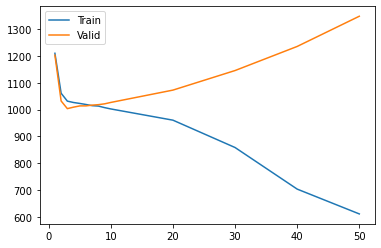

In [44]:

trainNLL = []
validNLL = []

#TODO block 3
ncomponents=[1,2,3,4,5,6,7,8,9,10,20,30,40,50]
for n in ncomponents:
    model_gmm=mixture.GaussianMixture(n_components=n,random_state=1729,covariance_type='spherical')
    model_train=model_gmm.fit(Xtrain)
    trainNLL.append(sum(-model_train.score_samples(Xtrain)))
    #model_val=model_gmm.fit(Xvalid)
    validNLL.append(sum(-model_train.score_samples(Xvalid)))

fig,ax=plt.subplots()
ax.plot(ncomponents,trainNLL,label='Train')
ax.plot(ncomponents,validNLL,label='Valid')
plt.legend()
print(trainNLL)
print(np.argmin(validNLL))
print(validNLL)
print(validNLL[2])

Compare the two graphs for the training data and validation respectively. In your judgement, what is the optimal number of components in the GMM?

Next, recreate the GMM with the optimal number of components and then use it to score the test data `Xtest`. Plot a histogram of the log likelihoods of the test data (using 20 bins). Write down what you notice about the histogram.

[  -4.57072401   -5.31649388   -4.57426408   -4.15395496   -7.32541302
   -3.74933668   -4.90284026   -3.60842487   -6.35707738   -4.28665321
   -3.76900043   -9.15177554   -3.88408671   -4.98776085   -5.2483825
   -6.1989847    -3.8425089    -6.12538362   -3.90621797   -6.06459055
   -3.91815825   -3.86876888   -5.40764131   -9.66754934   -3.61097581
   -6.01537631   -6.67949926   -5.46159148   -9.84606251   -5.37525989
   -7.09087032   -4.69039296   -4.80244545   -4.58318211   -4.5142314
   -4.78142577   -3.64228346   -4.06384804   -5.23397652   -4.34365099
   -4.12691863   -5.66176348   -6.42197859   -6.57489178   -7.25158336
   -4.30234423   -4.03625568   -3.95441684   -6.44139538   -6.61176072
   -4.87043278   -4.93582229   -7.69085283   -6.22470146   -4.50872095
   -4.08780324   -4.32727458   -4.39199368   -4.9318444    -5.37883816
   -4.29030128   -4.48104716   -4.55661522   -4.91530624   -4.46713807
   -3.97425204   -3.90625748   -4.35877486   -3.84077602   -8.35491666
   -4.36

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 199.]),
 array([-188.2082983 , -178.9599851 , -169.7116719 , -160.4633587 ,
        -151.21504551, -141.96673231, -132.71841911, -123.47010591,
        -114.22179271, -104.97347951,  -95.72516631,  -86.47685312,
         -77.22853992,  -67.98022672,  -58.73191352,  -49.48360032,
         -40.23528712,  -30.98697392,  -21.73866073,  -12.49034753,
          -3.24203433]),
 <BarContainer object of 20 artists>)

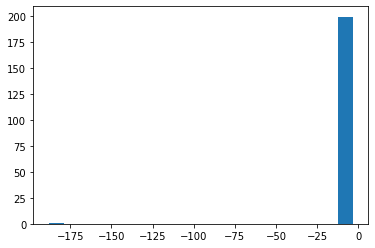

In [59]:
#TODO block 4
new_gmm=mixture.GaussianMixture(n_components=3,random_state=1729,covariance_type='spherical')
new_gmm.fit(Xtrain)

new_score= new_gmm.score_samples(Xtest)
print(new_score)
plt.hist(new_score,bins=20)

Finally, find the point with the minimum log likelihood under this GMM. Write down its index in the dataset and the coordinates of the point.

In [42]:
#TODO block 5
point=np.argmin(new_score)
print(point)
coordinates=Xtest[point]
print(coordinates)

199
[8. 8. 8. 8.]


## GTM experiments
There are two Python packages which implement GTM. `ugtm` is the better of the two, but is only moderate in quality (it doesn't include an implementation of magnification factors and the documentation is rather patchy). You should install the package using `pip install`.

***Reference:*** https://ugtm.readthedocs.io/en/latest/overview.html

If you have access and skills in Matlab, I would recommend using the Netlab implementation, which does include more functionality.

We start by showing how to initialise and fit a GTM to the same dataset we have been using.

The parameters are defined as follows:
    
* k : int, optional (default = 16)
        If k is set to 0, k is computed as sqrt(5*sqrt(n_individuals))+2.
        k is the sqrt of the number of GTM nodes.
        One of four GTM hyperparameters (k, m, s, regul).
        Ex: k = 25 means the GTM will be discretized into a 25x25 grid.
* m : int, optional (default = 4)
        If m is set to 0, m is computed as sqrt(k).
        m is the qrt of the number of RBF centers.
        One of four GTM hyperparameters (k, m, s, regul).
        Ex: m = 5 means the RBF functions will be arranged on a 5x5 grid.
* s : float, optional (default = 0.3)
        RBF width factor.
        One of four GTM hyperparameters (k, m, s, regul).
        Parameter to tune width of RBF functions.
        Impacts manifold flexibility.
* regul : float, optional (default = 0.1)
        One of four GTM hyperparameters (k, m, s, regul).
        Regularization coefficient.
* random_state : int (default = 1234)
        Random state.
* niter : int, optional (default = 200)
        Number of iterations for EM algorithm.
* verbose : bool, optional (default = False)
        Verbose mode (outputs loglikelihood values during EM algorithm).
* prior : {'estimated', 'equiprobable'}
        Type of prior for class map. Use 'estimated' to account for
        class imbalance.

Text(0.5, 1.0, 'k=10, m=5')

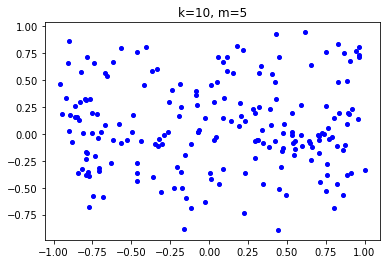

In [35]:
import ugtm

gtm = ugtm.eGTM( k=10, m=5, s=1, regul=0.5, random_state = 1729 )

gtm.fit(Xtrain)

points = gtm.transform(Xtest)


plt.figure(2)
scatterPlot = plt.plot(points[0:200, 0], points[0:200,1], 'b.', markersize=8)
plt.title('k=10, m=5')

Can you spot any outliers in this plot? 


Next, write some code to create plots for GTMs with fixed k=10 and let m = 3, 5, 7, 9, 11. Write down what you notice about these plots.

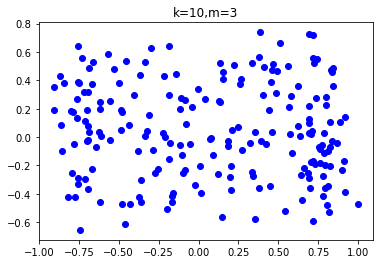

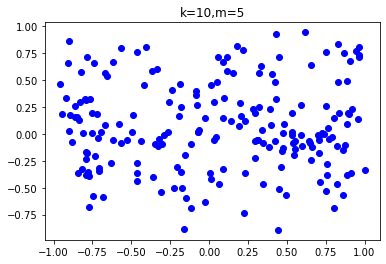

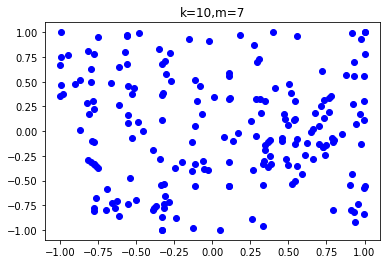

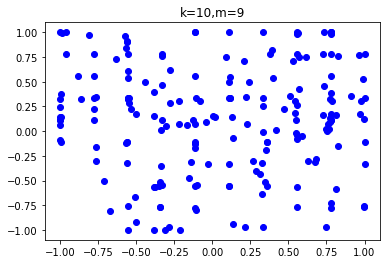

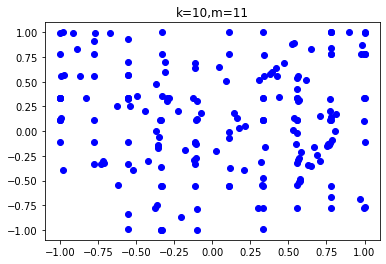

In [36]:
#TODO block 6
m_list=[3,5,7,9,11]
points_gtm=[]
for i in m_list:
    gtm_sort=ugtm.eGTM(k=10,m=i,s=1,regul=0.5,random_state=1729)
    gtm_sort.fit(Xtrain)
    points_gtm=gtm_sort.transform(Xtest)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(points_gtm[0:200,0],points_gtm[0:200,1],c='b')
    plt.title('k=10,m={}'.format(i))

Next, write some code to create plots for GTMs with k = 2, 3, 6, 8, 12 and fixed m = 5. Write down what you notice about these plots.

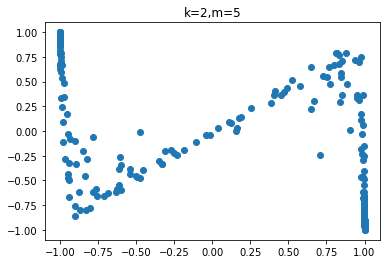

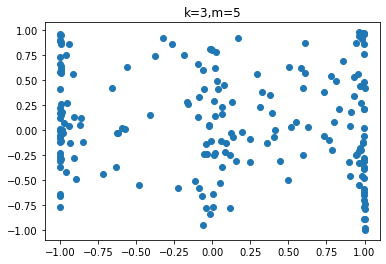

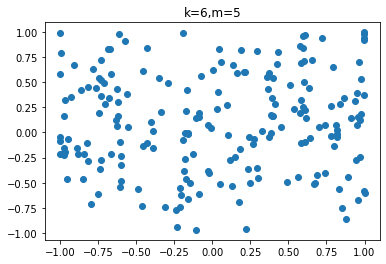

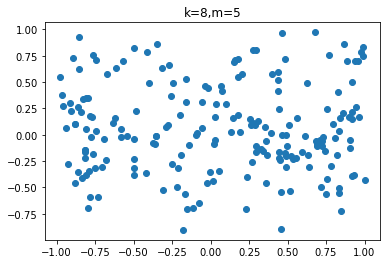

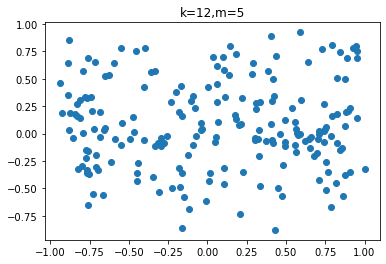

In [37]:
#TODO block 7
k_list=[2,3,6,8,12]
points_gtm=[]
for i in k_list:
    gtm_sort=ugtm.eGTM(k=i,m=5,s=1,regul=0.5,random_state=1729)
    gtm_sort.fit(Xtrain)
    points_gtm=gtm_sort.transform(Xtest)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(points_gtm[0:200,0],points_gtm[0:200,1])
    plt.title('k={},m=5'.format(i))


## GTM on digit data
In the next block, write some code to fit a GTM to the digit data with k=10 and m=6, and project the data to a variable `embedding`. Write down what you notice about the visualisation plot.

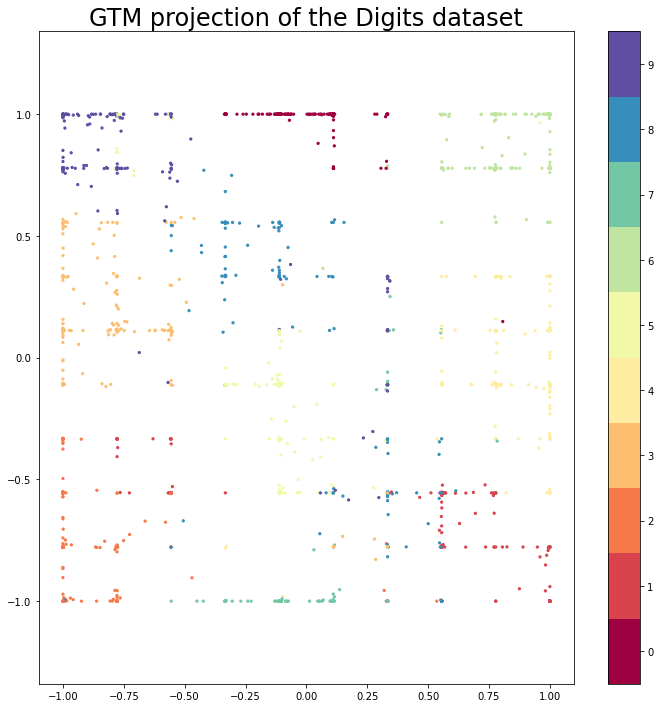

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
data=digits.data
target=digits.target

#TODO block 8
gtm_digit=ugtm.eGTM(k=10,m=6,s=1,regul=0.5,random_state=1729)
gtm_digit.fit(data)
embedding=gtm_digit.transform(data)
#Plotting code for a good figure.
plt.figure(figsize=(12, 12))

plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('GTM projection of the Digits dataset', fontsize=24);